In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
data = pd.read_parquet('/main/data/MVideo_2/dataset_main_6_m_1.parquet')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1163328 entries, 0 to 1163327
Data columns (total 99 columns):
STORE_ID                                               1163328 non-null category
PRODUCT_ID                                             1163328 non-null category
DATE                                                   1163328 non-null datetime64[ns]
REGULAR_SALES_PRICE_INCL_TAX                           1163328 non-null int32
MAINCATEGORY_ID                                        1163328 non-null category
SUBCATEGORY_ID                                         1163328 non-null category
REGION                                                 1163328 non-null category
INTERNET                                               1163328 non-null category
WEEK(DATE)                                             1163328 non-null category
MONTH(DATE)                                            1163328 non-null category
category.STD(trans.UNITS_SOLD_NP)_MAX_2                1163328 non-null fl

In [5]:
data_train = data[data.DATE < '2018-01-28']

In [6]:
data_train.shape[0]

894852

In [7]:
data_train2 = data[data.DATE <= '2018-02-18']

In [8]:
data_train2.shape[0]

1026469

In [9]:
data_val = data[(data.DATE >= '2018-01-28') & (data.DATE <= '2018-02-18')]

In [10]:
data_val.shape[0]

131617

In [11]:
data_test = data[data.DATE == '2018-03-18']

In [12]:
data_test.shape[0]

34790

In [13]:
feat = [s for s in data.columns if s not in ['DATE', 'UNITS_SOLD_P1']]

In [14]:
dts = lgb.Dataset(data_train[feat], label = data_train.UNITS_SOLD_P1)

In [15]:
dts = dts.construct()

In [16]:
dtsv = dts.create_valid(data_val[feat], label = data_val.UNITS_SOLD_P1)

In [17]:
params = {'application': 'regression_l2',
 'learning_rate': 0.01,
 'num_leaves': 1023,
 'min_data_in_leaf': 990,
 'min_sum_hessian_in_leaf': 0.01,
 'feature_fraction': 0.5,
 'bagging_fraction': 1.0,
 'bagging_freq': 2,
 'lambda_l2': 6.5149,
 'metric': 'l2_root'}

In [18]:
bst = lgb.train(params, dts, valid_sets = [dtsv], valid_names = ['Validation'],
                num_boost_round = 10000, early_stopping_rounds = 20)

[1]	Validation's rmse: 2.41598
Training until validation scores don't improve for 20 rounds.
[2]	Validation's rmse: 2.40393
[3]	Validation's rmse: 2.39182
[4]	Validation's rmse: 2.38129
[5]	Validation's rmse: 2.37074
[6]	Validation's rmse: 2.36296
[7]	Validation's rmse: 2.35384
[8]	Validation's rmse: 2.34618
[9]	Validation's rmse: 2.33669
[10]	Validation's rmse: 2.32728
[11]	Validation's rmse: 2.31798
[12]	Validation's rmse: 2.30753
[13]	Validation's rmse: 2.29933
[14]	Validation's rmse: 2.29092
[15]	Validation's rmse: 2.28018
[16]	Validation's rmse: 2.27319
[17]	Validation's rmse: 2.26373
[18]	Validation's rmse: 2.25543
[19]	Validation's rmse: 2.24825
[20]	Validation's rmse: 2.24116
[21]	Validation's rmse: 2.23396
[22]	Validation's rmse: 2.22555
[23]	Validation's rmse: 2.21802
[24]	Validation's rmse: 2.21003
[25]	Validation's rmse: 2.2023
[26]	Validation's rmse: 2.19543
[27]	Validation's rmse: 2.18721
[28]	Validation's rmse: 2.18121
[29]	Validation's rmse: 2.17347
[30]	Validation's rm

[252]	Validation's rmse: 1.76678
[253]	Validation's rmse: 1.76631
[254]	Validation's rmse: 1.76617
[255]	Validation's rmse: 1.76602
[256]	Validation's rmse: 1.76534
[257]	Validation's rmse: 1.76506
[258]	Validation's rmse: 1.76473
[259]	Validation's rmse: 1.76448
[260]	Validation's rmse: 1.76442
[261]	Validation's rmse: 1.76401
[262]	Validation's rmse: 1.76364
[263]	Validation's rmse: 1.76349
[264]	Validation's rmse: 1.76314
[265]	Validation's rmse: 1.76281
[266]	Validation's rmse: 1.7624
[267]	Validation's rmse: 1.7621
[268]	Validation's rmse: 1.76193
[269]	Validation's rmse: 1.76168
[270]	Validation's rmse: 1.7614
[271]	Validation's rmse: 1.76132
[272]	Validation's rmse: 1.76109
[273]	Validation's rmse: 1.76049
[274]	Validation's rmse: 1.76038
[275]	Validation's rmse: 1.75996
[276]	Validation's rmse: 1.75965
[277]	Validation's rmse: 1.75937
[278]	Validation's rmse: 1.75889
[279]	Validation's rmse: 1.75882
[280]	Validation's rmse: 1.75891
[281]	Validation's rmse: 1.75854
[282]	Validat

[502]	Validation's rmse: 1.73224
[503]	Validation's rmse: 1.73215
[504]	Validation's rmse: 1.73216
[505]	Validation's rmse: 1.73197
[506]	Validation's rmse: 1.73188
[507]	Validation's rmse: 1.73184
[508]	Validation's rmse: 1.73199
[509]	Validation's rmse: 1.73187
[510]	Validation's rmse: 1.73178
[511]	Validation's rmse: 1.73162
[512]	Validation's rmse: 1.7315
[513]	Validation's rmse: 1.73136
[514]	Validation's rmse: 1.73128
[515]	Validation's rmse: 1.73117
[516]	Validation's rmse: 1.73119
[517]	Validation's rmse: 1.73118
[518]	Validation's rmse: 1.73099
[519]	Validation's rmse: 1.73109
[520]	Validation's rmse: 1.73096
[521]	Validation's rmse: 1.73082
[522]	Validation's rmse: 1.73073
[523]	Validation's rmse: 1.73058
[524]	Validation's rmse: 1.73057
[525]	Validation's rmse: 1.73054
[526]	Validation's rmse: 1.73048
[527]	Validation's rmse: 1.73031
[528]	Validation's rmse: 1.73009
[529]	Validation's rmse: 1.73003
[530]	Validation's rmse: 1.73001
[531]	Validation's rmse: 1.72984
[532]	Valid

[752]	Validation's rmse: 1.71584
[753]	Validation's rmse: 1.71582
[754]	Validation's rmse: 1.71586
[755]	Validation's rmse: 1.71587
[756]	Validation's rmse: 1.71571
[757]	Validation's rmse: 1.71557
[758]	Validation's rmse: 1.7155
[759]	Validation's rmse: 1.71547
[760]	Validation's rmse: 1.71535
[761]	Validation's rmse: 1.71538
[762]	Validation's rmse: 1.71539
[763]	Validation's rmse: 1.71522
[764]	Validation's rmse: 1.71518
[765]	Validation's rmse: 1.71515
[766]	Validation's rmse: 1.7151
[767]	Validation's rmse: 1.71507
[768]	Validation's rmse: 1.71505
[769]	Validation's rmse: 1.71485
[770]	Validation's rmse: 1.7148
[771]	Validation's rmse: 1.71471
[772]	Validation's rmse: 1.71473
[773]	Validation's rmse: 1.71465
[774]	Validation's rmse: 1.71463
[775]	Validation's rmse: 1.71462
[776]	Validation's rmse: 1.71451
[777]	Validation's rmse: 1.71435
[778]	Validation's rmse: 1.7143
[779]	Validation's rmse: 1.71412
[780]	Validation's rmse: 1.7141
[781]	Validation's rmse: 1.71417
[782]	Validatio

[1002]	Validation's rmse: 1.70473
[1003]	Validation's rmse: 1.7047
[1004]	Validation's rmse: 1.70466
[1005]	Validation's rmse: 1.70462
[1006]	Validation's rmse: 1.70466
[1007]	Validation's rmse: 1.70461
[1008]	Validation's rmse: 1.70465
[1009]	Validation's rmse: 1.7047
[1010]	Validation's rmse: 1.7047
[1011]	Validation's rmse: 1.7047
[1012]	Validation's rmse: 1.70467
[1013]	Validation's rmse: 1.70466
[1014]	Validation's rmse: 1.70457
[1015]	Validation's rmse: 1.70452
[1016]	Validation's rmse: 1.70454
[1017]	Validation's rmse: 1.70457
[1018]	Validation's rmse: 1.70457
[1019]	Validation's rmse: 1.70459
[1020]	Validation's rmse: 1.70463
[1021]	Validation's rmse: 1.70458
[1022]	Validation's rmse: 1.70456
[1023]	Validation's rmse: 1.70458
[1024]	Validation's rmse: 1.70454
[1025]	Validation's rmse: 1.70431
[1026]	Validation's rmse: 1.7042
[1027]	Validation's rmse: 1.70421
[1028]	Validation's rmse: 1.70421
[1029]	Validation's rmse: 1.70414
[1030]	Validation's rmse: 1.70401
[1031]	Validation's

[1244]	Validation's rmse: 1.69845
[1245]	Validation's rmse: 1.69842
[1246]	Validation's rmse: 1.69846
[1247]	Validation's rmse: 1.69847
[1248]	Validation's rmse: 1.69843
[1249]	Validation's rmse: 1.69843
[1250]	Validation's rmse: 1.69838
[1251]	Validation's rmse: 1.69838
[1252]	Validation's rmse: 1.69832
[1253]	Validation's rmse: 1.69828
[1254]	Validation's rmse: 1.69832
[1255]	Validation's rmse: 1.69837
[1256]	Validation's rmse: 1.69832
[1257]	Validation's rmse: 1.6983
[1258]	Validation's rmse: 1.69834
[1259]	Validation's rmse: 1.69832
[1260]	Validation's rmse: 1.69834
[1261]	Validation's rmse: 1.69832
[1262]	Validation's rmse: 1.69827
[1263]	Validation's rmse: 1.69826
[1264]	Validation's rmse: 1.69828
[1265]	Validation's rmse: 1.69834
[1266]	Validation's rmse: 1.69836
[1267]	Validation's rmse: 1.69837
[1268]	Validation's rmse: 1.69836
[1269]	Validation's rmse: 1.69837
[1270]	Validation's rmse: 1.6984
[1271]	Validation's rmse: 1.6983
[1272]	Validation's rmse: 1.69827
[1273]	Validation

In [19]:
pred = bst.predict(data_test[feat])

In [20]:
np.sqrt(mean_squared_error(data_test.UNITS_SOLD_P1, pred))

1.6424047471210974

In [21]:
mean_absolute_error(data_test.UNITS_SOLD_P1, pred)

0.9720762962436912

In [22]:
pred2 = bst.predict(data_val[feat])

In [23]:
res = data_val[['DATE', 'PRODUCT_ID', 'STORE_ID', 'UNITS_SOLD_P1']].copy()

In [24]:
res['PRED_P1'] = pred2

In [25]:
def plot_ts(df, store_id, product_id):
    data_part = df[(df['STORE_ID'] == store_id) & (df['PRODUCT_ID'] == product_id)]
    week_range = data_part.DATE.drop_duplicates().sort_values().values
    #week_range = np.arange(data_part['DATE'].min(), data_part['DATE'].max())# + 1)
    ts = pd.DataFrame()
    ts['DATE'] = week_range
    df = pd.merge(ts, data_part, on = 'DATE', how = 'left')[['DATE', 'UNITS_SOLD_P1', 'PRED_P1']].fillna(0)
    plt.figure(figsize=(15, 4))
    plt.plot(df['DATE'].values, df['UNITS_SOLD_P1'].values, 'g^-', label='true')
    plt.plot(df['DATE'].values, df['PRED_P1'].values, 'ro-', label='pred')
    plt.xlabel('Week')
    plt.ylabel('Units sold')
    max_y = max(1, df['UNITS_SOLD_P1'].max(), df['PRED_P1'].max())
    plt.ylim((-0.05, max_y + 0.1))
    plt.title('The ts for product - %s and store - %s' % (product_id, store_id))
    plt.legend(loc='best')
    plt.show()

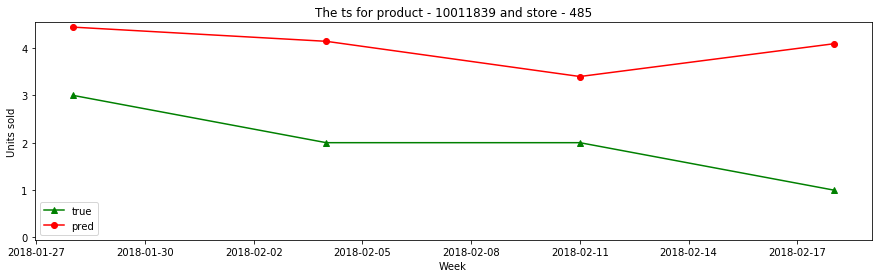

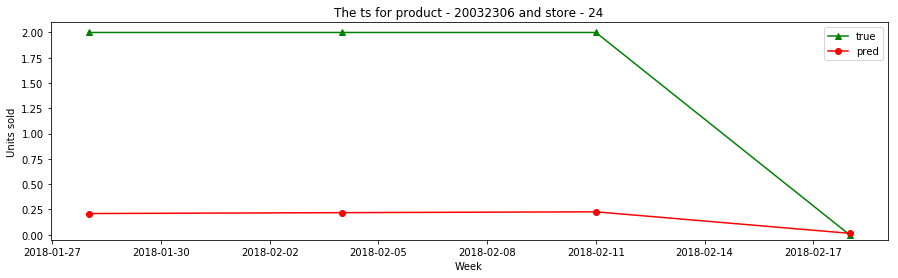

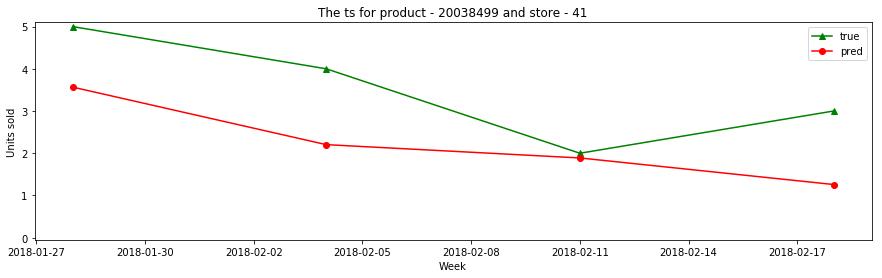

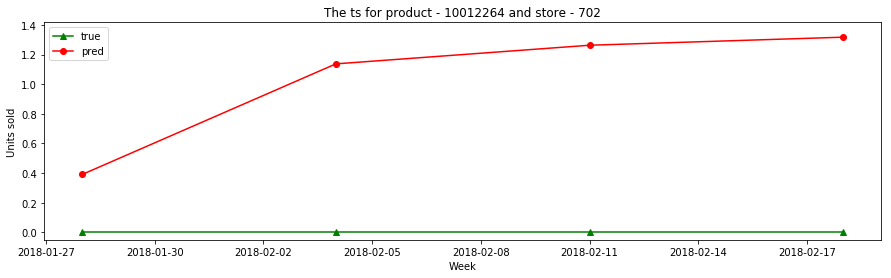

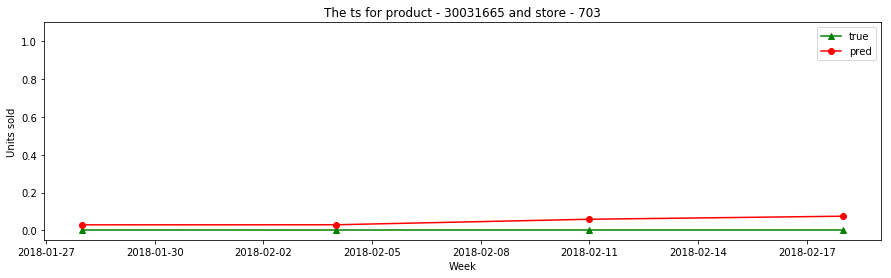

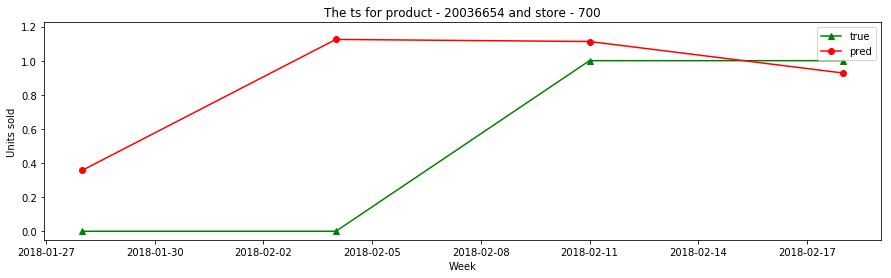

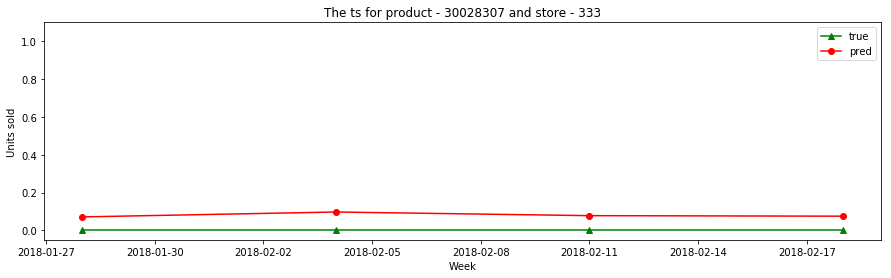

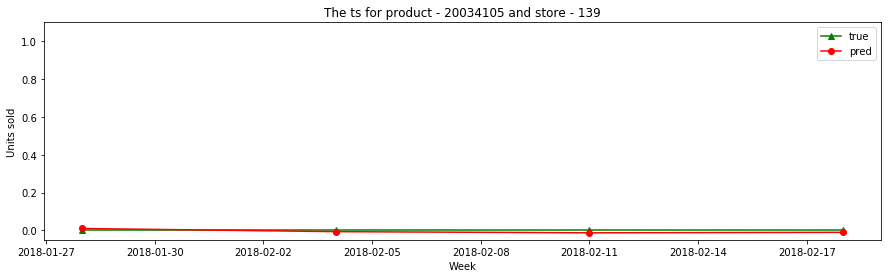

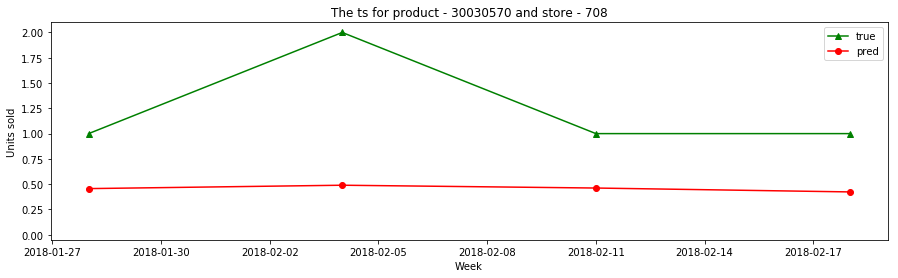

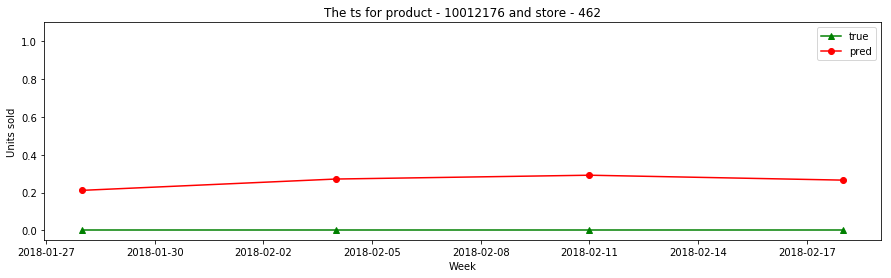

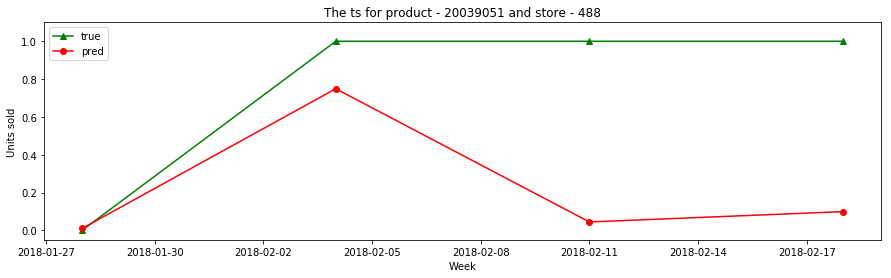

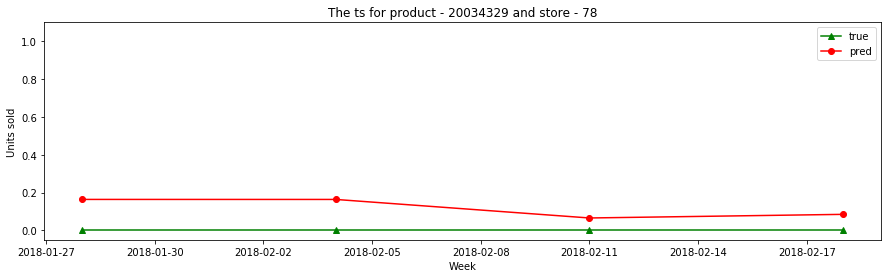

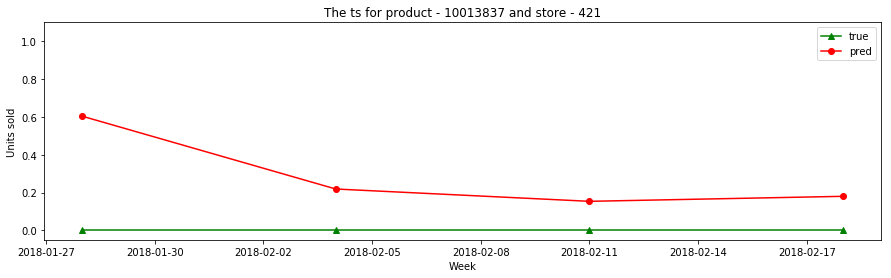

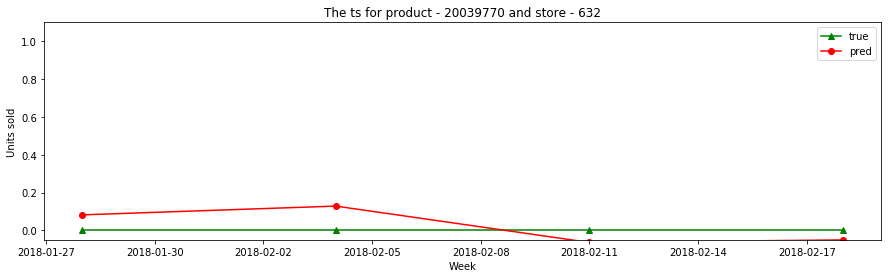

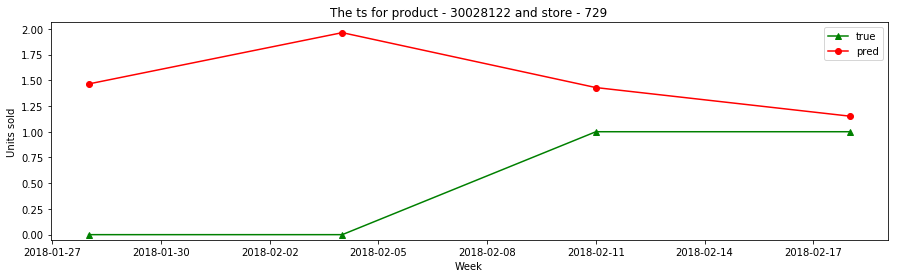

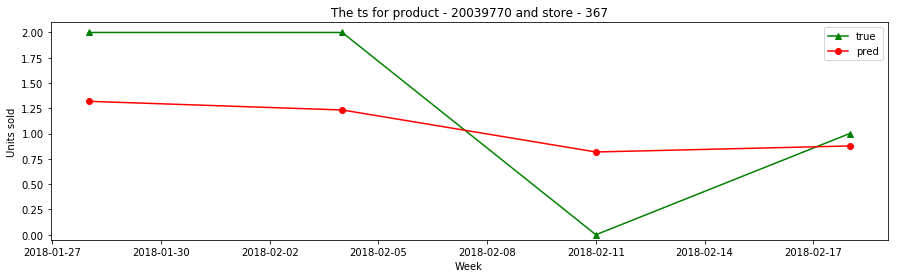

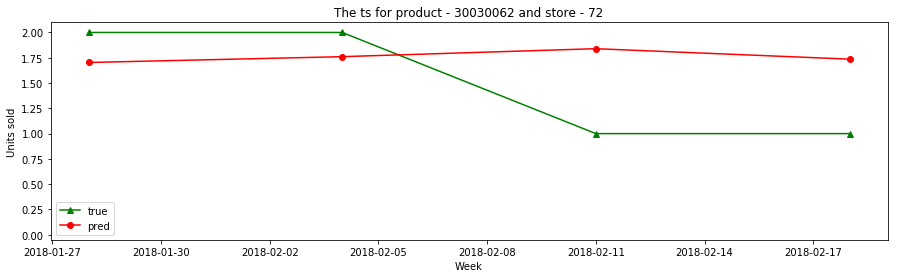

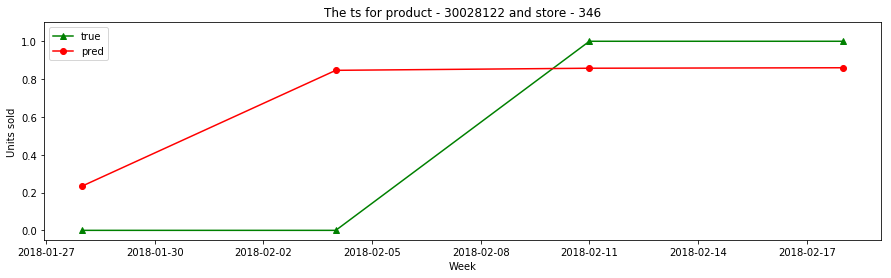

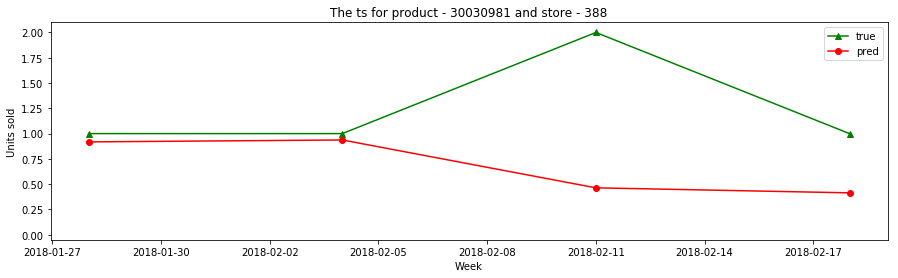

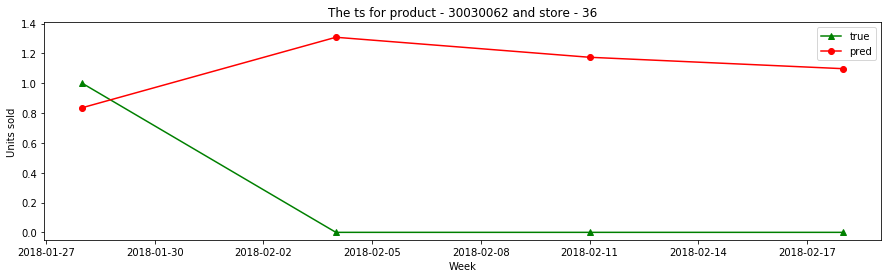

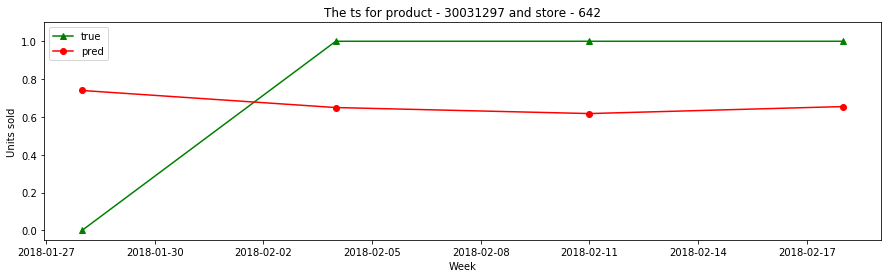

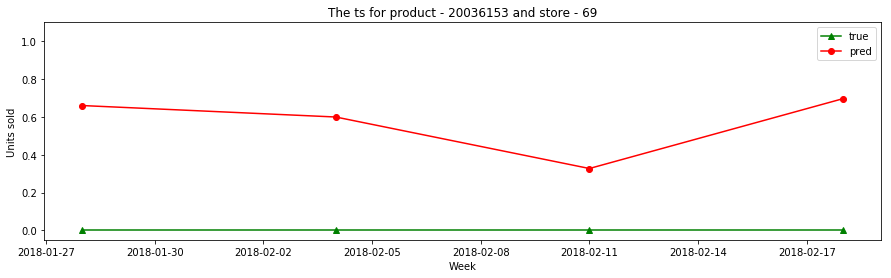

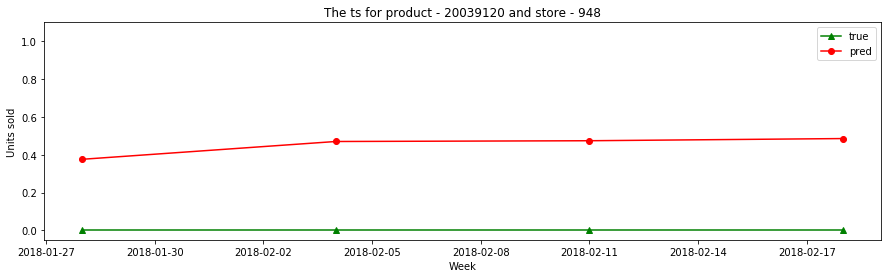

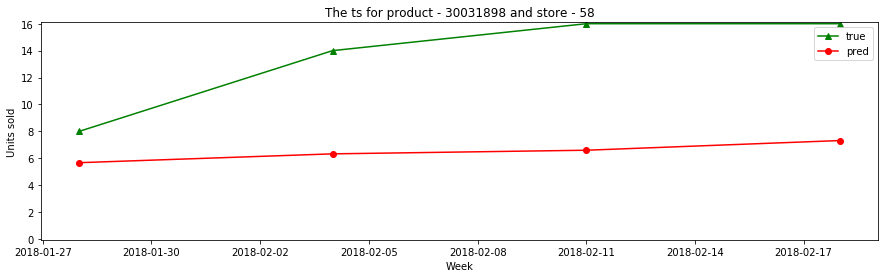

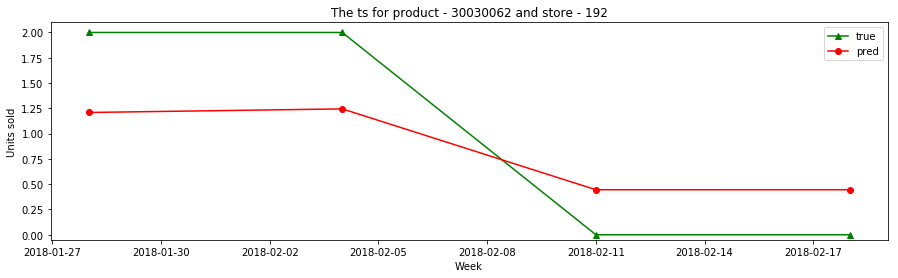

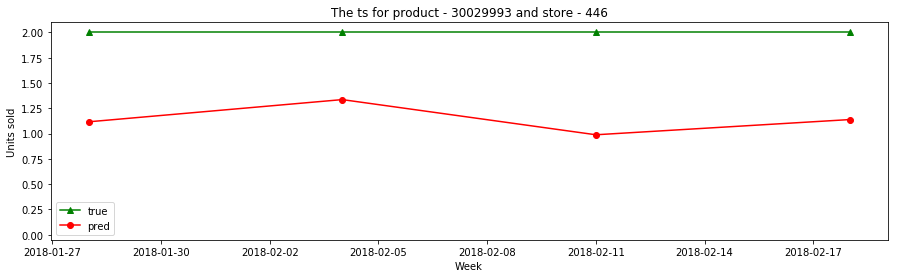

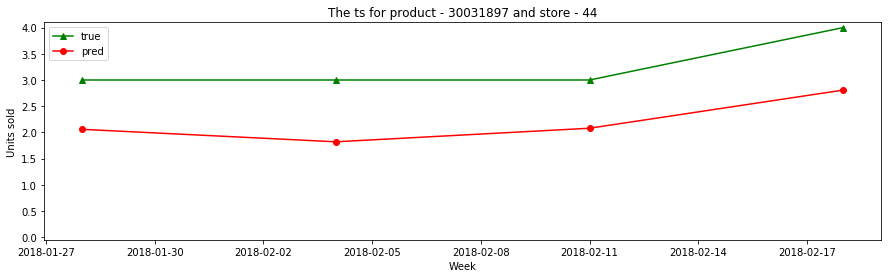

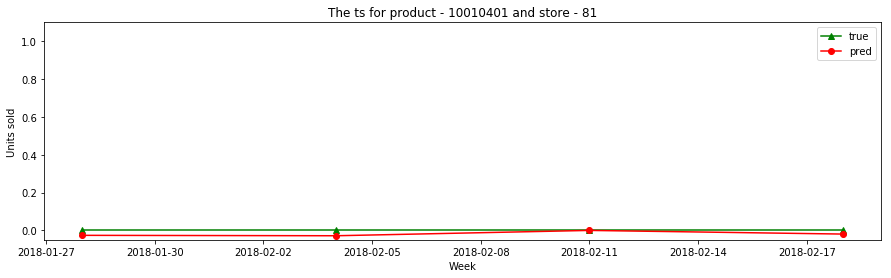

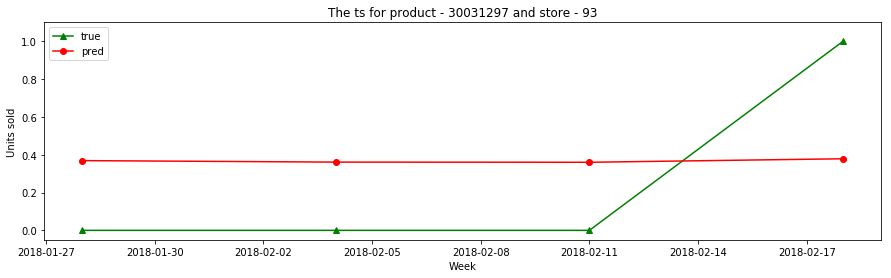

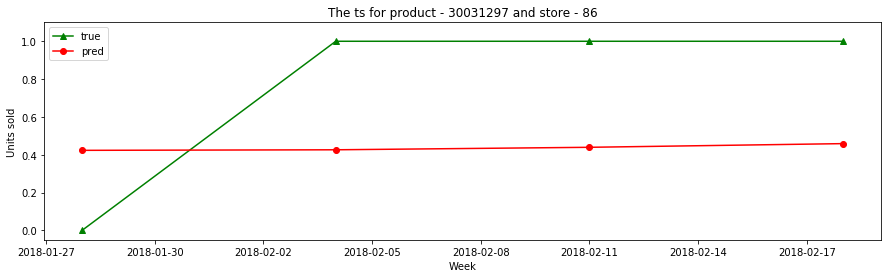

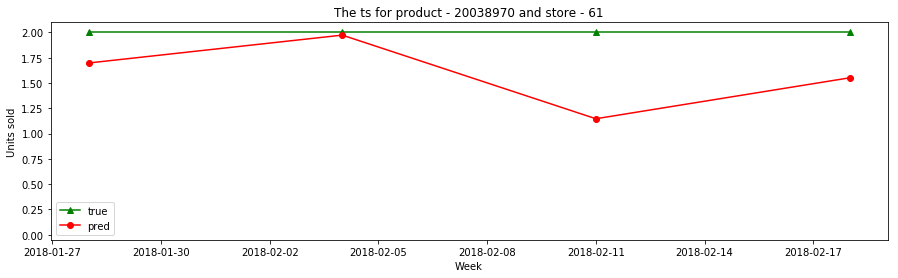

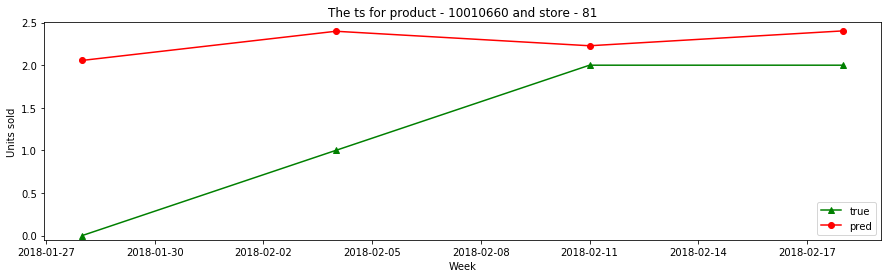

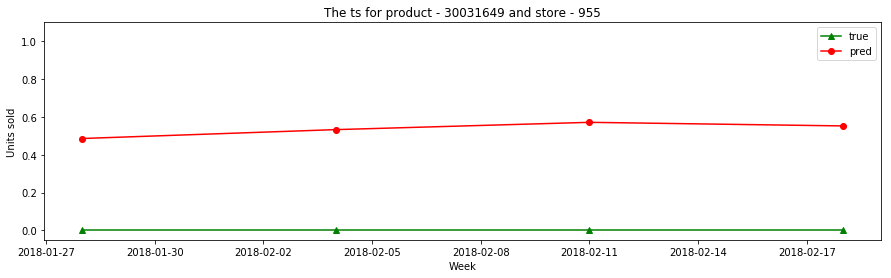

In [26]:
pairs = list(set(zip(res['STORE_ID'], res['PRODUCT_ID'])))

for i in range(len(pairs) // 1000):
    store_id, product_id = pairs[i]
    plot_ts(res, store_id, product_id)

In [27]:
dts2 = lgb.Dataset(data_train2[feat], label = data_train2.UNITS_SOLD_P1)

In [28]:
dts2 = dts2.construct()

In [29]:
bst.current_iteration()

1276

In [30]:
bst2 = lgb.train(params, dts2, num_boost_round = bst.current_iteration())

In [31]:
pred3 = bst2.predict(data_test[feat])

In [32]:
np.sqrt(mean_squared_error(data_test.UNITS_SOLD_P1, pred3))

1.559199509525815

In [33]:
mean_absolute_error(data_test.UNITS_SOLD_P1, pred3)

0.9315205452642559

In [34]:
sc = bst2.feature_importance(importance_type='gain')

In [35]:
score = pd.DataFrame(100 * sc / np.sum(sc),
                     index = bst2.feature_name(), columns = ['Score'])

In [36]:
score = score.sort_values('Score', ascending=False)

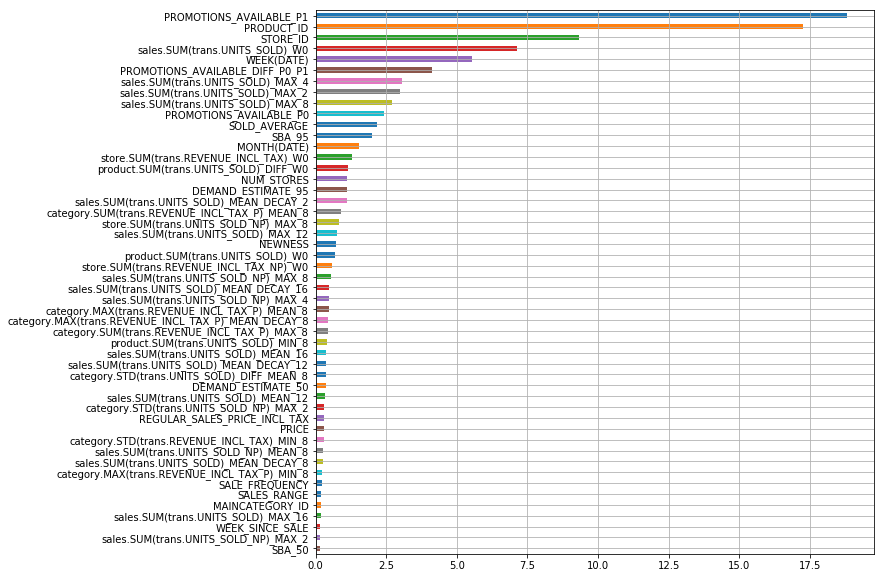

In [37]:
score.head(50).Score.plot.barh(grid=True, figsize=(10,10)).invert_yaxis()

In [38]:
res2 = data_test[['PRODUCT_ID', 'STORE_ID']].copy()

In [39]:
res2['PRED'] = pred3

In [40]:
res3 = pd.read_parquet('/main/data/MVideo_2/dataset_test_6.parquet')

In [41]:
res3 = res3[res3.DATE <= '2018-04-15'].copy()

In [42]:
res3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139160 entries, 0 to 139159
Data columns (total 4 columns):
STORE_ID      139160 non-null category
PRODUCT_ID    139160 non-null category
DATE          139160 non-null datetime64[ns]
UNITS_SOLD    139160 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 3.8 MB


In [43]:
res3 = res3.merge(res2)

In [44]:
res3.PRED /= 4

In [45]:
res3.PRED.clip(lower = 0, inplace = True)

In [46]:
res3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139160 entries, 0 to 139159
Data columns (total 5 columns):
STORE_ID      139160 non-null category
PRODUCT_ID    139160 non-null category
DATE          139160 non-null datetime64[ns]
UNITS_SOLD    139160 non-null float64
PRED          139160 non-null float64
dtypes: category(2), datetime64[ns](1), float64(2)
memory usage: 4.8 MB


In [47]:
np.sqrt(mean_squared_error(res3.UNITS_SOLD, res3.PRED))

0.7088319151018347

In [48]:
mean_absolute_error(res3.UNITS_SOLD, res3.PRED)

0.3842516723160637

In [49]:
res3old = res3[res3.DATE == '2018-03-25']

In [50]:
np.sqrt(mean_squared_error(res3old.UNITS_SOLD, res3old.PRED))

0.7174586626178089

In [51]:
mean_absolute_error(res3old.UNITS_SOLD, res3old.PRED)

0.38518748096450817

In [52]:
res3new = res3[res3.DATE > '2018-03-25']

In [53]:
np.sqrt(mean_squared_error(res3new.UNITS_SOLD, res3new.PRED))

0.7059329059012156

In [54]:
mean_absolute_error(res3new.UNITS_SOLD, res3new.PRED)

0.38393973609991555

In [55]:
res3new.to_parquet('/main/data/MVideo_2/results_6_m_1.parquet')